## 1. Importing important libraries

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [4]:
data1 = pd.read_csv('glass.csv',sep=',')
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 3. Data Understanding

In [5]:
data1.shape

(214, 10)

In [5]:
data1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
data1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data1.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

## 4. Model Building

In [6]:
X = data1.drop('Type',axis=1)
y = data1[['Type']]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [8]:
print(x_train.shape)
print(y_train.shape)

(171, 9)
(171, 1)


In [9]:
print(x_test.shape)
print(y_test.shape)

(43, 9)
(43, 1)


## Model Training | Testing | Evaluation without NORMALIZATION¶

### Generating a Model with K = 3

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7209


### Generating a Model with K = 5

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7907


### Generating a Model with K = 7

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7442


### choosing optimum k 

In [18]:
neighbours = list(range(1,50,2))
x = []

for i in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    acc_score = (round(accuracy_score(y_test,y_pred),4))
    print('Acuuracy score for ',i,'is ', acc_score)
    x.append(acc_score)

Acuuracy score for  1 is  0.7442
Acuuracy score for  3 is  0.7209
Acuuracy score for  5 is  0.7907
Acuuracy score for  7 is  0.7442
Acuuracy score for  9 is  0.6977
Acuuracy score for  11 is  0.7209
Acuuracy score for  13 is  0.6512
Acuuracy score for  15 is  0.6744
Acuuracy score for  17 is  0.6977
Acuuracy score for  19 is  0.6744
Acuuracy score for  21 is  0.6744
Acuuracy score for  23 is  0.6744
Acuuracy score for  25 is  0.6977
Acuuracy score for  27 is  0.6977
Acuuracy score for  29 is  0.6744
Acuuracy score for  31 is  0.6279
Acuuracy score for  33 is  0.6279
Acuuracy score for  35 is  0.6279
Acuuracy score for  37 is  0.5814
Acuuracy score for  39 is  0.5814
Acuuracy score for  41 is  0.5814
Acuuracy score for  43 is  0.5814
Acuuracy score for  45 is  0.5581
Acuuracy score for  47 is  0.6279
Acuuracy score for  49 is  0.5814


In [28]:
max(x)

0.7907

In [20]:
neighbours[x.index(max(x))]

5

## Model Training | Testing | Evaluation with NORMALIZATION


### Generating a Model with K = 3

In [21]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((171, 9), (171, 1), (43, 9), (43, 1))

In [23]:
X_train

array([[-1.20610400e-01,  3.70875159e-01,  8.65488567e-01, ...,
        -5.26095044e-01, -3.52876828e-01,  9.56587946e-01],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01],
       [-1.73419864e-01, -4.02421917e-01,  5.59727851e-01, ...,
        -3.28887568e-01, -3.52876828e-01, -5.86450902e-01],
       ...,
       [ 1.24253390e+00,  9.84602997e-01,  7.89048388e-01, ...,
         4.31769840e-01, -3.52876828e-01, -5.86450902e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00, ...,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00]])

In [24]:
X_test

array([[ 4.77197670e-02, -2.55127236e-01,  6.57015352e-01,
        -7.52670580e-01,  2.31729707e-01,  1.12106515e-01,
        -3.85232561e-01, -1.71445763e-01,  1.16232646e+00],
       [-7.51023380e-01,  1.96656754e+00, -1.86551055e+00,
         2.13830494e+00,  5.16433114e-01, -6.87074327e-01,
        -8.94213472e-02,  7.15550557e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.10434805e-01,
         1.28915501e-01, -3.52876828e-01,  3.21971159e+00],
       [-5.45985699e-02, -9.67051528e-01,  5.24430284e-02,
        -1.23449983e+00,  1.49995398e+00, -2.26008457e-01,
         3.26122977e-01, -3.52876828e-01,  1.47093423e+00],
       [ 1.83044019e-01,  6.40112399e-02,  7.95997495e-01,
        -3.71222421e-01, -1.30620085e-01,  1.12106515e-01,
        -5.26095044e-01, -3.52876828e-01,  8.53718690e-01],
       [ 1.12371260e+00, -2.55127236e-01,  6.91760888e-01,
        -5.92060829e-01,  1.28201195e-01,  6.599992

In [25]:
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train,Y_train)
Y_pred = knn_model1.predict(X_test)
print("Accuracy score: ", round(accuracy_score(Y_test,Y_pred),4))

Accuracy score:  0.7674


### Generating a Model with K = 5 

In [26]:
knn_model1 = KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(X_train,Y_train)
Y_pred = knn_model1.predict(X_test)
print("Accuracy score: ", round(accuracy_score(Y_test,Y_pred),4))

Accuracy score:  0.6512


### Generating a Model with K = 7

In [27]:
knn_model1 = KNeighborsClassifier(n_neighbors=7)
knn_model1.fit(X_train,Y_train)
Y_pred = knn_model1.predict(X_test)
print("Accuracy score: ", round(accuracy_score(Y_test,Y_pred),4))

Accuracy score:  0.6279


In [34]:
neighbours = list(range(1,50,2))
c = []

for i in neighbours:
    knn_model1 = KNeighborsClassifier(n_neighbors=i)
    knn_model1.fit(X_train,Y_train)
    Y_pred = knn_model1.predict(X_test)
    acc_score1 = (round(accuracy_score(Y_test,Y_pred),4))
    print('Acuuracy score for ',i,'is ', acc_score1)
    c.append(acc_score1)

Acuuracy score for  1 is  0.7674
Acuuracy score for  3 is  0.7674
Acuuracy score for  5 is  0.6512
Acuuracy score for  7 is  0.6279
Acuuracy score for  9 is  0.5814
Acuuracy score for  11 is  0.5814
Acuuracy score for  13 is  0.5349
Acuuracy score for  15 is  0.5581
Acuuracy score for  17 is  0.5581
Acuuracy score for  19 is  0.5814
Acuuracy score for  21 is  0.5814
Acuuracy score for  23 is  0.5581
Acuuracy score for  25 is  0.5581
Acuuracy score for  27 is  0.5349
Acuuracy score for  29 is  0.5349
Acuuracy score for  31 is  0.5349
Acuuracy score for  33 is  0.5349
Acuuracy score for  35 is  0.5349
Acuuracy score for  37 is  0.5349
Acuuracy score for  39 is  0.5581
Acuuracy score for  41 is  0.5814
Acuuracy score for  43 is  0.5814
Acuuracy score for  45 is  0.5581
Acuuracy score for  47 is  0.4651
Acuuracy score for  49 is  0.3953


In [31]:
max(c)

0.7674

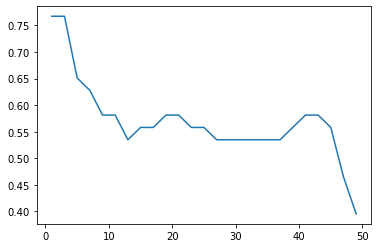

In [36]:
plt.plot(neighbours,x)

### Conclusion

* As we can see, before standardizing my maximum accuracy is 0.79 and after standardizing the accuracy is 0.76. Hence I will go with the model without standardizing the input variables
* The maximum accuracy for the model is when K=5